In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict, cross_val_score
from sqlalchemy import column


In [3]:
# read in the dataset
df = pd.read_csv('data/breast_cancer.csv')

# take a look at the data
df.head(5)


,,,,,,,,,,,,,,,,,,,,,,,,,,,569,30,malignant,benign
17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
# check dataset size
df.shape


(569, 4)

In [5]:
# split data into inputs and targets
X = df.drop(columns=['benign'])
y = df['benign']


In [6]:
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y)
X_test


,,,,,,,,,,,,,,,,,,,,,,,,,,,569,30,malignant
11.27,12.96,73.16,386.3,0.12370,0.11110,0.079000,0.055500,0.2018,0.06914,0.2562,0.9858,1.809,16.04,0.006635,0.017770,0.021010,0.011640,0.02108,0.003721,12.84,20.53,84.93,476.1,0.16100,0.24290,0.224700,0.13180,0.3343,0.09215
19.69,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.040060,0.038320,0.020580,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.14440,0.42450,0.450400,0.24300,0.3613,0.08758
12.86,13.32,82.82,504.8,0.11340,0.08834,0.038000,0.034000,0.1543,0.06476,0.2212,1.0420,1.614,16.57,0.005910,0.020160,0.019020,0.010110,0.01202,0.003107,14.04,21.08,92.80,599.5,0.15470,0.22310,0.179100,0.11550,0.2382,0.08553
21.75,20.99,147.30,1491.0,0.09401,0.19610,0.219500,0.108800,0.1721,0.06194,1.1670,1.3520,8.867,156.80,0.005687,0.049600,0.063290,0.015610,0.01924,0.004614,28.19,28.18,195.90,2384.0,0.12720,0.47250,0.580700,0.18410,0.2833,0.08858
13.30,21.57,85.24,546.1,0.08582,0.06373,0.033440,0.024240,0.1815,0.05696,0.2621,1.5390,2.028,20.98,0.005498,0.020450,0.017950,0.006399,0.01829,0.001956,14.20,29.20,92.94,621.2,0.11400,0.16670,0.121200,0.05614,0.2637,0.06658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12.72,13.78,81.78,492.1,0.09667,0.08393,0.012880,0.019240,0.1638,0.06100,0.1807,0.6931,1.340,13.38,0.006064,0.011800,0.006564,0.007978,0.01374,0.001392,13.50,17.48,88.54,553.7,0.12980,0.14720,0.052330,0.06343,0.2369,0.06922
13.20,17.43,84.13,541.6,0.07215,0.04524,0.043360,0.011050,0.1487,0.05635,0.1630,1.6010,0.873,13.56,0.006261,0.015690,0.030790,0.005383,0.01962,0.002250,13.94,27.82,88.28,602.0,0.11010,0.15080,0.229800,0.04970,0.2767,0.07198
20.34,21.51,135.90,1264.0,0.11700,0.18750,0.256500,0.150400,0.2569,0.06670,0.5702,1.0230,4.012,69.06,0.005485,0.024310,0.031900,0.013690,0.02768,0.003345,25.30,31.86,171.10,1938.0,0.15920,0.44920,0.534400,0.26850,0.5558,0.10240
11.93,10.91,76.14,442.7,0.08872,0.05242,0.026060,0.017960,0.1601,0.05541,0.2522,1.0450,1.649,18.95,0.006175,0.012040,0.013760,0.005832,0.01096,0.001857,13.80,20.14,87.64,589.5,0.13740,0.15750,0.151400,0.06876,0.2460,0.07262


In [48]:
type(y_test)

pandas.core.series.Series

In [7]:
# 合并 X_train 和 y_train
X_y_train = X_train.copy()
X_y_train.insert(loc=len(X_y_train.columns), column='benign', value=y_train)
X_y_train

,,,,,,,,,,,,,,,,,,,,,,,,,,,569,30,malignant,benign
11.040,14.93,70.67,372.7,0.07987,0.07079,0.03546,0.02074,0.2003,0.06246,0.1642,1.0310,1.281,11.680,0.005296,0.01903,0.01723,0.006960,0.01880,0.001941,12.09,20.83,79.73,447.1,0.10950,0.19820,0.15530,0.06754,0.3202,0.07287,1
14.440,15.18,93.97,640.1,0.09970,0.10210,0.08487,0.05532,0.1724,0.06081,0.2406,0.7394,2.120,21.200,0.005706,0.02297,0.03114,0.014930,0.01454,0.002528,15.85,19.85,108.60,766.9,0.13160,0.27350,0.31030,0.15990,0.2691,0.07683,1
17.080,27.15,111.20,930.9,0.09898,0.11100,0.10070,0.06431,0.1793,0.06281,0.9291,1.1520,6.051,115.200,0.008740,0.02219,0.02721,0.014580,0.02045,0.004417,22.96,34.49,152.10,1648.0,0.16000,0.24440,0.26390,0.15550,0.3010,0.09060,0
18.940,21.31,123.60,1130.0,0.09009,0.10290,0.10800,0.07951,0.1582,0.05461,0.7888,0.7975,5.486,96.050,0.004444,0.01652,0.02269,0.013700,0.01386,0.001698,24.86,26.58,165.90,1866.0,0.11930,0.23360,0.26870,0.17890,0.2551,0.06589,0
12.850,21.37,82.63,514.5,0.07551,0.08316,0.06126,0.01867,0.1580,0.06114,0.4993,1.7980,2.552,41.240,0.006011,0.04480,0.05175,0.013410,0.02669,0.007731,14.40,27.01,91.63,645.8,0.09402,0.19360,0.18380,0.05601,0.2488,0.08151,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12.040,28.14,76.85,449.9,0.08752,0.06000,0.02367,0.02377,0.1854,0.05698,0.6061,2.6430,4.099,44.960,0.007517,0.01555,0.01465,0.011830,0.02047,0.003883,13.60,33.33,87.24,567.6,0.10410,0.09726,0.05524,0.05547,0.2404,0.06639,1
12.050,22.72,78.75,447.8,0.06935,0.10730,0.07943,0.02978,0.1203,0.06659,0.1194,1.4340,1.778,9.549,0.005042,0.04560,0.04305,0.016670,0.02470,0.007358,12.57,28.71,87.36,488.4,0.08799,0.32140,0.29120,0.10920,0.2191,0.09349,1
9.847,15.68,63.00,293.2,0.09492,0.08419,0.02330,0.02416,0.1387,0.06891,0.2498,1.2160,1.976,15.240,0.008732,0.02042,0.01062,0.006801,0.01824,0.003494,11.24,22.99,74.32,376.5,0.14190,0.22430,0.08434,0.06528,0.2502,0.09209,1
20.730,31.12,135.70,1419.0,0.09469,0.11430,0.13670,0.08646,0.1769,0.05674,1.1720,1.6170,7.749,199.700,0.004551,0.01478,0.02143,0.009280,0.01367,0.002299,32.49,47.16,214.00,3432.0,0.14010,0.26440,0.34420,0.16590,0.2868,0.08218,0


In [8]:
X_train

,,,,,,,,,,,,,,,,,,,,,,,,,,,569,30,malignant
11.040,14.93,70.67,372.7,0.07987,0.07079,0.03546,0.02074,0.2003,0.06246,0.1642,1.0310,1.281,11.680,0.005296,0.01903,0.01723,0.006960,0.01880,0.001941,12.09,20.83,79.73,447.1,0.10950,0.19820,0.15530,0.06754,0.3202,0.07287
14.440,15.18,93.97,640.1,0.09970,0.10210,0.08487,0.05532,0.1724,0.06081,0.2406,0.7394,2.120,21.200,0.005706,0.02297,0.03114,0.014930,0.01454,0.002528,15.85,19.85,108.60,766.9,0.13160,0.27350,0.31030,0.15990,0.2691,0.07683
17.080,27.15,111.20,930.9,0.09898,0.11100,0.10070,0.06431,0.1793,0.06281,0.9291,1.1520,6.051,115.200,0.008740,0.02219,0.02721,0.014580,0.02045,0.004417,22.96,34.49,152.10,1648.0,0.16000,0.24440,0.26390,0.15550,0.3010,0.09060
18.940,21.31,123.60,1130.0,0.09009,0.10290,0.10800,0.07951,0.1582,0.05461,0.7888,0.7975,5.486,96.050,0.004444,0.01652,0.02269,0.013700,0.01386,0.001698,24.86,26.58,165.90,1866.0,0.11930,0.23360,0.26870,0.17890,0.2551,0.06589
12.850,21.37,82.63,514.5,0.07551,0.08316,0.06126,0.01867,0.1580,0.06114,0.4993,1.7980,2.552,41.240,0.006011,0.04480,0.05175,0.013410,0.02669,0.007731,14.40,27.01,91.63,645.8,0.09402,0.19360,0.18380,0.05601,0.2488,0.08151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12.040,28.14,76.85,449.9,0.08752,0.06000,0.02367,0.02377,0.1854,0.05698,0.6061,2.6430,4.099,44.960,0.007517,0.01555,0.01465,0.011830,0.02047,0.003883,13.60,33.33,87.24,567.6,0.10410,0.09726,0.05524,0.05547,0.2404,0.06639
12.050,22.72,78.75,447.8,0.06935,0.10730,0.07943,0.02978,0.1203,0.06659,0.1194,1.4340,1.778,9.549,0.005042,0.04560,0.04305,0.016670,0.02470,0.007358,12.57,28.71,87.36,488.4,0.08799,0.32140,0.29120,0.10920,0.2191,0.09349
9.847,15.68,63.00,293.2,0.09492,0.08419,0.02330,0.02416,0.1387,0.06891,0.2498,1.2160,1.976,15.240,0.008732,0.02042,0.01062,0.006801,0.01824,0.003494,11.24,22.99,74.32,376.5,0.14190,0.22430,0.08434,0.06528,0.2502,0.09209
20.730,31.12,135.70,1419.0,0.09469,0.11430,0.13670,0.08646,0.1769,0.05674,1.1720,1.6170,7.749,199.700,0.004551,0.01478,0.02143,0.009280,0.01367,0.002299,32.49,47.16,214.00,3432.0,0.14010,0.26440,0.34420,0.16590,0.2868,0.08218


In [9]:
# 使用交叉验证的方式划分训练集
kf = KFold(n_splits=3, shuffle=True, random_state=42)
# for train, test in kf.split(X_y_train):
#     df_base_train = X_y_train.iloc[train]
#     df_base_test = X_y_train.iloc[test]
#     X_base_train = df_base_train.drop(columns=['benign'])
#     y_base_train = df_base_train['benign']
#     X_base_test = df_base_test.drop(columns=['benign'])
#     y_base_test = df_base_test['benign']

# X_base_train


In [10]:
# 计算训练预测样本的香农熵，并插入到新表中
import math


def insert_entropy(predict_train):
    df = pd.DataFrame(predict_train)
    df['entropy'] = df[[0, 1]].apply(lambda x: shannon_entropy(x[0], x[1]), axis=1)
    return df

# 香农熵


def shannon_entropy(p, q):
    if (p <= 0.000001 or q <= 0.000001):
        return 0
    else:
        return -(p * math.log(p) + q * math.log(q))


In [11]:
# knn model
knn = KNeighborsClassifier(n_neighbors=5)
knn_probility_test = np.array([[.0, .0]])
knn_y_test = pd.DataFrame()
for train, test in kf.split(X_y_train):
    df_base_train = X_y_train.iloc[train]
    df_base_test = X_y_train.iloc[test]
    X_base_train = df_base_train.drop(columns=['benign'])
    y_base_train = df_base_train['benign']
    X_base_test = df_base_test.drop(columns=['benign'])
    y_base_test = df_base_test['benign']
    df_y_base_test = pd.DataFrame(y_base_test)
    knn.fit(X_base_train, y_base_train)
    # knn_probility_train = knn.predict_proba(X_test)
    knn_probility_test = np.concatenate((knn_probility_test, knn.predict_proba(X_base_test)), axis=0)
    knn_y_test = knn_y_test.append(df_y_base_test)

knn_probility_test = np.delete(knn_probility_test, 0, axis = 0)
knn_probility_test


array([[0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0.4, 0.6],
       [0. , 1. ],
       [0.2, 0.8],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.6, 0.4],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [0.8, 0.2],
       [0. , 1. ],
       [0.4, 0.6],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0.4, 0.6],
       [0.2, 0.8],
       [0.4, 0.6],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [0.8, 0.2],
       [0. , 1. ],
       [0.4, 0.6],
       [0.2, 0.8],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [0.4, 0.6],
       [0.2, 0.8],
       [0. , 1. ],
       [0. ,

In [12]:
type(knn_y_test)

pandas.core.frame.DataFrame

In [13]:
knn_y_test["benign"]

11.040  14.93  70.67   372.7   0.07987  0.07079  0.03546  0.020740  0.2003  0.06246  0.1642  1.0310  1.281  11.680  0.005296  0.019030  0.01723  0.006960  0.01880  0.001941  12.090  20.83  79.73   447.1   0.10950  0.1982  0.15530    1
18.940  21.31  123.60  1130.0  0.09009  0.10290  0.10800  0.079510  0.1582  0.05461  0.7888  0.7975  5.486  96.050  0.004444  0.016520  0.02269  0.013700  0.01386  0.001698  24.860  26.58  165.90  1866.0  0.11930  0.2336  0.26870    0
8.618   11.79  54.34   224.5   0.09752  0.05272  0.02061  0.007799  0.1683  0.07187  0.1559  0.5796  1.046  8.322   0.010110  0.010550  0.01981  0.005742  0.02090  0.002788  9.507   15.40  59.90   274.9   0.17330  0.1239  0.11680    1
11.520  18.75  73.34   409.0   0.09524  0.05473  0.03036  0.022780  0.1920  0.05907  0.3249  0.9591  2.183  23.470  0.008328  0.008722  0.01349  0.008670  0.03218  0.002386  12.840  22.47  81.81   506.2   0.12490  0.0872  0.09076    1
11.710  16.67  74.72   423.6   0.10510  0.06095  0.03592  0.

In [14]:
df_knn_probility_test = insert_entropy(knn_probility_test)
df_knn_probility_test.insert(loc=len(df_knn_probility_test.columns), column='benign', value=knn_y_test['benign'].values)
df_knn_probility_test.to_csv('knn_probility_test.csv')
df_knn_probility_test

,0,1,entropy,benign
0,0.0,1.0,0.000000,1
1,1.0,0.0,0.000000,0
2,0.0,1.0,0.000000,1
3,0.0,1.0,0.000000,1
4,0.4,0.6,0.673012,1
...,...,...,...,...
450,1.0,0.0,0.000000,0
451,0.2,0.8,0.500402,1
452,1.0,0.0,0.000000,0
453,0.0,1.0,0.000000,1


In [15]:
lda = LDA(n_components=1)
lda_probility_test = np.array([[.0, .0]])
for train, test in kf.split(X_y_train):
    df_base_train = X_y_train.iloc[train]
    df_base_test = X_y_train.iloc[test]
    X_base_train = df_base_train.drop(columns=['benign'])
    y_base_train = df_base_train['benign']
    X_base_test = df_base_test.drop(columns=['benign'])
    y_base_test = df_base_test['benign']
    sc = StandardScaler()
    X_base_train_std = sc.fit_transform(X_base_train)
    X_base_test_std = sc.fit_transform(X_base_test)
    lda.fit_transform(X_base_train_std, y_base_train)
    lda_probility_test = np.concatenate((lda_probility_test, lda.predict_proba(X_base_test)), axis=0)

lda_probility_test = np.delete(lda_probility_test, 0, axis = 0)
lda_probility_test

array([[0.30610751, 0.69389249],
       [0.42055775, 0.57944225],
       [0.28111838, 0.71888162],
       [0.3029448 , 0.6970552 ],
       [0.29813927, 0.70186073],
       [0.29365617, 0.70634383],
       [0.34486048, 0.65513952],
       [0.34645017, 0.65354983],
       [0.36748215, 0.63251785],
       [0.37525403, 0.62474597],
       [0.46421339, 0.53578661],
       [0.33578719, 0.66421281],
       [0.42986486, 0.57013514],
       [0.30700093, 0.69299907],
       [0.4164309 , 0.5835691 ],
       [0.48860365, 0.51139635],
       [0.32733518, 0.67266482],
       [0.24891126, 0.75108874],
       [0.50322625, 0.49677375],
       [0.42513205, 0.57486795],
       [0.29462384, 0.70537616],
       [0.35147312, 0.64852688],
       [0.24243628, 0.75756372],
       [0.44104988, 0.55895012],
       [0.45267661, 0.54732339],
       [0.3311868 , 0.6688132 ],
       [0.31084515, 0.68915485],
       [0.3030785 , 0.6969215 ],
       [0.4506327 , 0.5493673 ],
       [0.28849899, 0.71150101],
       [0.

In [16]:
df_lda_probility_test = insert_entropy(lda_probility_test)
df_lda_probility_test.insert(loc=len(df_lda_probility_test.columns), column='benign', value=knn_y_test['benign'].values)
df_lda_probility_test.to_csv('lda_probility_test.csv')
df_lda_probility_test

,0,1,entropy,benign
0,0.306108,0.693892,0.615951,1
1,0.420558,0.579442,0.680471,0
2,0.281118,0.718882,0.594006,1
3,0.302945,0.697055,0.613339,1
4,0.298139,0.701861,0.609279,1
...,...,...,...,...
450,0.413167,0.586833,0.677990,0
451,0.209681,0.790319,0.513533,1
452,0.347454,0.652546,0.645856,0
453,0.269905,0.730095,0.583164,1


In [17]:
gnb=GaussianNB()
gnb_probility_test = np.array([[.0, .0]])
for train, test in kf.split(X_y_train):
    df_base_train = X_y_train.iloc[train]
    df_base_test = X_y_train.iloc[test]
    X_base_train = df_base_train.drop(columns=['benign'])
    y_base_train = df_base_train['benign']
    X_base_test = df_base_test.drop(columns=['benign'])
    y_base_test = df_base_test['benign']
    gnb.fit(X_base_train, y_base_train)
    gnb_probility_test = np.concatenate((gnb_probility_test, gnb.predict_proba(X_base_test)), axis=0)

gnb_probility_test = np.delete(gnb_probility_test, 0, axis = 0)
gnb_probility_test

array([[1.82056965e-02, 9.81794304e-01],
       [8.97339314e-01, 1.02660686e-01],
       [1.24618158e-02, 9.87538184e-01],
       [2.04389884e-02, 9.79561012e-01],
       [3.59334272e-02, 9.64066573e-01],
       [4.85965720e-03, 9.95140343e-01],
       [1.98089598e-01, 8.01910402e-01],
       [7.07411595e-02, 9.29258840e-01],
       [2.40269011e-01, 7.59730989e-01],
       [4.88224067e-01, 5.11775933e-01],
       [9.98725751e-01, 1.27424885e-03],
       [1.12983920e-01, 8.87016080e-01],
       [9.77258214e-01, 2.27417864e-02],
       [8.25238793e-03, 9.91747612e-01],
       [9.65252492e-01, 3.47475081e-02],
       [9.99692113e-01, 3.07887485e-04],
       [2.00543829e-01, 7.99456171e-01],
       [1.12121626e-03, 9.98878784e-01],
       [9.99981129e-01, 1.88710066e-05],
       [9.99302293e-01, 6.97706685e-04],
       [4.92948712e-03, 9.95070513e-01],
       [1.11368022e-01, 8.88631978e-01],
       [1.91736040e-03, 9.98082640e-01],
       [9.93001545e-01, 6.99845482e-03],
       [9.932424

In [18]:
df_gnb_probility_test = insert_entropy(gnb_probility_test)
df_gnb_probility_test.insert(loc=len(df_gnb_probility_test.columns), column='benign', value=knn_y_test['benign'].values)
df_gnb_probility_test.to_csv('gnb_probility_test.csv')
df_gnb_probility_test

,0,1,entropy,benign
0,0.018206,0.981794,0.090971,1
1,0.897339,0.102661,0.330890,0
2,0.012462,0.987538,0.067030,1
3,0.020439,0.979561,0.099743,1
4,0.035933,0.964067,0.154798,1
...,...,...,...,...
450,0.999995,0.000005,0.000070,0
451,0.005460,0.994540,0.033895,1
452,0.904888,0.095112,0.314208,0
453,0.114706,0.885294,0.356242,1


In [19]:
# 计算 Loss (三个基分类器kNN、LDA、GN)
import math

def loss(alpha):
    if alpha[0] < 0 or alpha[1] < 0 or alpha[2] < 0 or alpha[0] > math.log(2) or alpha[1] > math.log(2) or alpha[2] > math.log(2):
        return 100.0
    classifier_1 = pd.read_csv("knn_probility_test.csv", sep=',', index_col=0)
    classifier_2 = pd.read_csv("lda_probility_test.csv", sep=',', index_col=0)
    classifier_3 = pd.read_csv("gnb_probility_test.csv", sep=',', index_col=0)
    N = len(classifier_1)
    l = .0
    for i in range(N):
        a = .0
        b = .0
        if (classifier_1.iloc[i][2] < alpha[0]):
            a = a + classifier_1.iloc[i][0]
            b = b + classifier_1.iloc[i][1]
        if (classifier_2.iloc[i][2] < alpha[1]):
            a = a + classifier_2.iloc[i][0]
            b = b + classifier_2.iloc[i][1]
        if (classifier_3.iloc[i][2] < alpha[2]):
            a = a + classifier_3.iloc[i][0]
            b = b + classifier_3.iloc[i][1]
        if a < b:
            y_predict = 1
        else:
            y_predict = 0

        benign = classifier_1.iloc[i][3]
        l += float(benign != y_predict)

    l /= float(N)

    return l


In [68]:
l = loss([math.log(2) , 0, math.log(2)])
l

0.08791208791208792

Iteration 0: Best Cost = 0.08131868131868132
Iteration 1: Best Cost = 0.08131868131868132
Iteration 2: Best Cost = 0.08131868131868132
Iteration 3: Best Cost = 0.08131868131868132
Iteration 4: Best Cost = 0.08131868131868132
Iteration 5: Best Cost = 0.08131868131868132
Iteration 6: Best Cost = 0.08131868131868132
Iteration 7: Best Cost = 0.08131868131868132
Iteration 8: Best Cost = 0.08131868131868132
Iteration 9: Best Cost = 0.08131868131868132
Iteration 10: Best Cost = 0.08131868131868132
Iteration 11: Best Cost = 0.08131868131868132
Iteration 12: Best Cost = 0.08131868131868132
Iteration 13: Best Cost = 0.08131868131868132
Iteration 14: Best Cost = 0.08131868131868132
Iteration 15: Best Cost = 0.08131868131868132
Iteration 16: Best Cost = 0.08131868131868132
Iteration 17: Best Cost = 0.08131868131868132
Iteration 18: Best Cost = 0.08131868131868132
Iteration 19: Best Cost = 0.08131868131868132
Iteration 20: Best Cost = 0.08131868131868132
Iteration 21: Best Cost = 0.0813186813186813

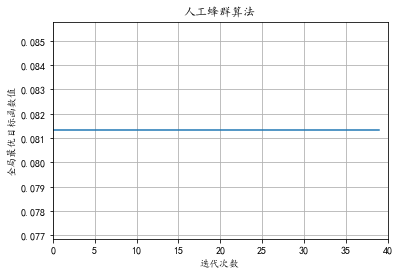

In [63]:
import matplotlib.pyplot as plt
import numpy as np
from ypstruct import structure
import time
import math
import artificial_bee_colony

start = time.time()         #运行开始时刻

# 问题定义
problem = structure()
problem.costfunc = loss
problem.nvar = 3
problem.varmin = .0 * np.ones(3)
problem.varmax = math.log(2) * np.ones(3)

# ABC参数
params = structure()
params.maxit = 40
params.npop = 50
params.nonlooker = 100
params.a = 1

# 运行ABC
out = artificial_bee_colony.run(problem, params)
# 运行结果
plt.rcParams['font.sans-serif'] = ['KaiTi']  #设置字体为楷体
plt.plot(out.bestcost)
print("最优解：{}".format(out.bestsol))
end = time.time()              # 运行结束时刻
print('运行时间：{}s'.format(end-start))

plt.xlim(0, params.maxit)
plt.xlabel('迭代次数')
plt.ylabel('全局最优目标函数值')
plt.title('人工蜂群算法')
plt.grid(True)
plt.show()

In [74]:
alpha = out['bestsol']['position']

In [20]:
# alpha = [0.67548542, 0.43867688, 0.00332863]

In [63]:
knn_test = knn.predict_proba(X_test)
lda_test = lda.predict_proba(X_test)
gnb_test = gnb.predict_proba(X_test)

df_knn_test = insert_entropy(knn_test)
df_lda_test = insert_entropy(lda_test)
df_gnb_test = insert_entropy(gnb_test)

df_y_predict = pd.DataFrame(data=[], columns=['y_predict'])
df_y_predict['y_test'] = y_test.values



In [64]:
df_y_predict

,y_predict,y_test
0,NaN,1
1,NaN,0
2,NaN,1
3,NaN,0
4,NaN,1
...,...,...
109,NaN,1
110,NaN,1
111,NaN,0
112,NaN,1


In [26]:
df_gnb_test

,0,1,entropy
0,0.674232,3.257682e-01,0.631141
1,0.999981,1.911432e-05,0.000227
2,0.090567,9.094333e-01,0.303847
3,0.957711,4.228930e-02,0.175153
4,0.003554,9.964465e-01,0.023588
...,...,...,...
109,0.004430,9.955697e-01,0.028429
110,0.002872,9.971278e-01,0.019678
111,1.000000,2.812234e-14,0.000000
112,0.005487,9.945135e-01,0.034031


In [67]:


N = len(df_knn_test)
for i in range(N):
    a = .0
    b = .0
    if (df_knn_test.iloc[i]['entropy'] < alpha[0]):
        a = a + df_knn_test.iloc[i][0]
        b = b + df_knn_test.iloc[i][1]
    if (df_lda_test.iloc[i]['entropy'] < alpha[1]):
        a = a + df_lda_test.iloc[i][0]
        b = b + df_lda_test.iloc[i][1]
    if (df_gnb_test.iloc[i]['entropy'] < alpha[2]):
        a = a + df_gnb_test.iloc[i][0]
        b = b + df_gnb_test.iloc[i][1]
    if a < b:
        df_y_predict.at[i, 'y_predict'] = 1
    else:
        df_y_predict.at[i, 'y_predict'] = 0



In [68]:
df_y_predict

,y_predict,y_test
0,1,1
1,0,0
2,1,1
3,0,0
4,1,1
...,...,...
109,1,1
110,1,1
111,0,0
112,1,1


In [69]:
count = 0
for i in range(N):
    if df_y_predict.iloc[i][0] == df_y_predict.iloc[i][1]:
        count += 1

float(count) / float(N)

0.9210526315789473

In [70]:
# test the three models with the test data and print their accuracy scores

print('knn: {}'.format(knn.score(X_test, y_test)))
print('lda: {}'.format(lda.score(X_test, y_test)))
print('gnb: {}'.format(gnb.score(X_test, y_test)))


knn: 0.9210526315789473
lda: 0.631578947368421
gnb: 0.8771929824561403


In [71]:
#create a dictionary of our models
estimators=[('knn', knn), ('lda', lda), ('gnb', gnb)]

#create our voting classifier, inputting our models
ensemble = VotingClassifier(estimators, voting='hard')

#fit model to training data
ensemble.fit(X_train, y_train)

#test our model on the test data
ensemble.score(X_test, y_test)

0.9122807017543859